In [3]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms 
from torch.utils.data import DataLoader


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


tf = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
    ])

train_dl = DataLoader(
    datasets.ImageFolder('data/Training',tf),
    batch_size=32 , shuffle=True , pin_memory= True
)

test_dl = DataLoader(
    datasets.ImageFolder('data/Testing',tf),
    batch_size=32 , shuffle=True , pin_memory= True
)


In [4]:
model = nn.Sequential(
    nn.Conv2d(3,32,3,1,1), nn.ReLU(), nn.MaxPool2d(2),
    nn.Conv2d(32,64,3,1,1), nn.ReLU(), nn.MaxPool2d(2),
    nn.Conv2d(64,128,3,1,1), nn.ReLU(), nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(128 * 16 * 16, 256), nn.ReLU(), nn.Dropout(0.5),
    nn.Linear(256, 4)   # 4 classes
).to(device)

In [5]:
opt = optim.AdamW(model.parameters(),1e-4)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
for epoch in range(50):
    running_loss = 0.0
    model.train()
    for x, y in train_dl:
        x, y = x.to(device), y.to(device)

        opt.zero_grad()
        preds = model(x)
        loss = loss_fn(preds, y)
        loss.backward()
        opt.step()
        running_loss += loss.item()
        
    print(f"Epoch {epoch+1} : Loss was  {running_loss}")    

Epoch 1 : Loss was  0.0
Epoch 2 : Loss was  0.0
Epoch 3 : Loss was  0.0
Epoch 4 : Loss was  0.0
Epoch 5 : Loss was  0.0
Epoch 6 : Loss was  0.0
Epoch 7 : Loss was  0.0
Epoch 8 : Loss was  0.0
Epoch 9 : Loss was  0.0
Epoch 10 : Loss was  0.0
Epoch 11 : Loss was  0.0
Epoch 12 : Loss was  0.0
Epoch 13 : Loss was  0.0
Epoch 14 : Loss was  0.0
Epoch 15 : Loss was  0.0
Epoch 16 : Loss was  0.0
Epoch 17 : Loss was  0.0
Epoch 18 : Loss was  0.0
Epoch 19 : Loss was  0.0
Epoch 20 : Loss was  0.0
Epoch 21 : Loss was  0.0
Epoch 22 : Loss was  0.0
Epoch 23 : Loss was  0.0
Epoch 24 : Loss was  0.0
Epoch 25 : Loss was  0.0
Epoch 26 : Loss was  0.0
Epoch 27 : Loss was  0.0
Epoch 28 : Loss was  0.0
Epoch 29 : Loss was  0.0
Epoch 30 : Loss was  0.0
Epoch 31 : Loss was  0.0
Epoch 32 : Loss was  0.0
Epoch 33 : Loss was  0.0
Epoch 34 : Loss was  0.0
Epoch 35 : Loss was  0.0
Epoch 36 : Loss was  0.0
Epoch 37 : Loss was  0.0
Epoch 38 : Loss was  0.0
Epoch 39 : Loss was  0.0
Epoch 40 : Loss was  0.0
Epoch 41 

In [25]:
model.eval()
test_loss , correct = 0.0,0
with torch.no_grad():
    for x,y in test_dl:
        x,y = x.to(device) , y.to(device)
        
        logits = model(x)
        test_loss += loss_fn(logits,y).item() * y.size(0)
        
        preds = logits.argmax(dim =1)
        correct += (preds==y).sum().item()
        
test_loss /= len(test_dl.dataset)
accuracy = 100.0 * correct / len(test_dl.dataset)         


print('Test Loss:', test_loss, 'Test Accuracy: ',accuracy)

Test Loss: 0.15240532730371353 Test Accuracy:  97.48283752860412


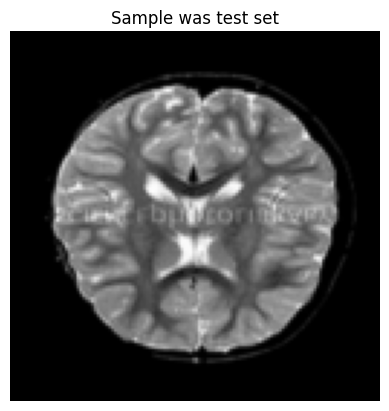

Predicted class: notumor
Ground Reality : notumor


In [41]:
import random
from torchvision.transforms.functional import to_pil_image
import matplotlib.pyplot as plt


model.eval()

idx = random.randrange(len(test_dl.dataset))
img, label = test_dl.dataset[idx]

unnorm = img * 0.5 + 0.5
plt.imshow(to_pil_image(unnorm))
plt.axis('off')
plt.title("Sample was test set")
plt.show()

with torch.no_grad():
    logits = model(img.unsqueeze(0).to(device))
    pred = logits.argmax(1).item()
    
class_name = test_dl.dataset.classes
print(f"Predicted class: {class_name[pred]}")
print(f"Ground Reality : {class_name[label]}")    
    